In [1]:
import pandas as pd

## Raw data cleaning and feature engineering

In [2]:
# Load in raw data from csv file
raw = pd.read_csv('../data/raw/adr6921_Suppl_Excel_v2.csv',
                  encoding_errors='replace')

In [3]:
# Inspect first few rows of the dataframe
raw.head(20)

,factory_id,country,lat,long,company,data_type,material_type,material_type_simple,comm_name,sci_name,func_group,source,website,date
0,1,Argentina,-37.9784,-57.5903,Agustiner S.A.,A,fishery by-products,by-products,NaN,NaN,NaN,IFFO,https://seafood.media/agustiner/,24-Feb
1,2,Argentina,-38.0462,-57.5459,Coomarpes Ltda.,A,fishery by-products,by-products,NaN,NaN,NaN,IFFO,https://www.coomarpes.com.ar/en/,24-Feb
2,3,Argentina,-42.7223,-65.0332,Harinas Patagonicas S.R.L,A,fishery by-products,by-products,shrimp,NaN,Shrimps,NaN,https://www.aquafeed.com/newsroom/news/argenti...,24-Apr
3,4,Argentina,-38.0015,-57.6648,Gihon- Laboratorios Químicos SRL,A,NaN,NaN,NaN,NaN,NaN,MarinTrust,https://www.gihonlab.com/en/naturales/producto...,24-Mar
4,5,Australia,-33.4335,150.9982,CSF Proteins Pty Ltd,A,misc by-products,by-products,NaN,NaN,NaN,IFFO,https://www.csfproteins.com.au,24-Feb
5,6,Australia,-37.8230,144.8131,CSF Proteins Pty Ltd,A,misc by-products,by-products,NaN,NaN,NaN,IFFO,https://www.csfproteins.com.au,24-Feb
6,7,Australia,-35.9502,150.0980,Proteins Australia Pty Ltd,A,whole,whole,mackerel,Scomber scombrus,Medium pelagics (30 - 89 cm),MarinTrust,NaN,24-Mar
7,8,Australia,-42.1581,146.6091,NuBlend Pty Ltd,C,misc by-products,by-products,NaN,NaN,NaN,https://www.trade-seafood.com/directory/seafoo...,https://www.nublend.com.au/index.php/products,24-Feb
8,9,Australia,-37.8158,144.9663,Australian Fishmeal Company,A,whole,whole,NaN,NaN,NaN,NaN,https://fishmeal.co/,24-Apr
9,10,Brazil,-29.5099,-52.0675,FASA,A,misc by-products,by-products,NaN,NaN,NaN,https://brazilianrenderers.com/members/,https://www.fasa.ind.br/produtos/?lang=en,24-Apr


In [4]:
# Aggregate data by country through pivot tables of different attributes
# Each pivot table counts the number of factories per country for each attribute category

# Total number of unique factories per country
factory_pivot = raw.pivot_table(
    index='country', values='factory_id', aggfunc='nunique')
# Number of factories per country per material type
material_pivot = raw.pivot_table(index='country', columns=[
                                 'material_type'], values='factory_id', aggfunc='nunique', fill_value=0)
# Number of factories per country per common name
comm_name_pivot = raw.pivot_table(index='country', columns=[
                                  'comm_name'], values='factory_id', aggfunc='nunique', fill_value=0)
# Number of factories per country per scientific name
sci_name_pivot = raw.pivot_table(index='country', columns=[
                                 'sci_name'], values='factory_id', aggfunc='nunique', fill_value=0)
# Number of factories per country per functional group
func_group_pivot = raw.pivot_table(index='country', columns=[
                                   'func_group'], values='factory_id', aggfunc='nunique', fill_value=0)

In [5]:
material_pivot.head()

material_type,aquaculture by-products,fishery by-products,misc by-products,whole
country,,,,
Argentina,0,3,0,0
Australia,0,0,3,2
Brazil,0,0,8,0
Canada,0,7,0,0
Chile,11,8,0,27


In [6]:
# Drop squid column from comm_name_pivot because that is present in func_group_pivot already and is just duplicated
comm_name_pivot = comm_name_pivot.drop(columns=['Squid'])

# Rename factory_id column in factory_pivot to total_factories for clarity
factory_pivot = factory_pivot.rename(columns={'factory_id': 'total_factories'})

In [7]:
# Obtain list of unique countries in dataset and set it as dataframe index
countries = raw['country'].unique()
countries_df = pd.DataFrame(index=countries)
countries_df.index.name = 'country'

In [8]:
# Join all pivot tables into a final dataframe indexed by country
final = countries_df.join(
    [factory_pivot, material_pivot, comm_name_pivot, sci_name_pivot, func_group_pivot])

# reset index to make country a column again
final = final.reset_index()

# Fill Nan values with 0
final = final.fillna(0)

# Write final dataframe to csv
final.to_csv('../data/processed/factory_counts_by_country.csv', index=False)

In [9]:
# Inspect first few rows of the final dataframe
final.head()

,country,total_factories,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
0,Argentina,4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Australia,5,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,8,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada,7,0.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
4,Chile,33,11.0,8.0,0.0,27.0,0.0,0.0,4.0,8.0,...,0.0,0.0,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0


In [10]:
# Inspect data for Chile and Peru
final[(final['country'] == 'Chile') | (final['country'] == 'Peru')]

,country,total_factories,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
4,Chile,33,11.0,8.0,0.0,27.0,0.0,0.0,4.0,8.0,...,0.0,0.0,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0
40,Peru,125,0.0,49.0,0.0,76.0,0.0,0.0,76.0,0.0,...,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0


In [11]:
# Convert columns with counts the number of factories per country for each attribute category into percent of total factories in that country for better comparison between countries
final_percent = final.copy()
# Skip first two columns (country and total_factories)
for col in final.columns[2:]:
    final_percent[col] = round(final[col] / final['total_factories']*100, 2)

In [12]:
final_percent.head()

,country,total_factories,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
0,Argentina,4,0.00,75.00,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,25.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,Australia,5,0.00,0.00,60.0,40.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,Brazil,8,0.00,0.00,100.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,Canada,7,0.00,100.00,0.0,0.00,0.0,14.29,0.00,14.29,...,0.0,0.0,0.00,0.0,14.29,28.57,0.0,0.0,0.0,0.0
4,Chile,33,33.33,24.24,0.0,81.82,0.0,0.00,12.12,24.24,...,0.0,0.0,3.03,0.0,0.00,69.70,0.0,0.0,0.0,0.0


In [13]:
# Making sure none of the rows have a ratio more than 1
final_percent[(final_percent[final_percent.columns[2:]] < 75).all(axis=1)]

,country,total_factories,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
1,Australia,5,0.00,0.00,60.0,40.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
5,China,22,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
8,Ecuador,18,0.00,72.22,0.0,27.78,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,5.56,0.00,72.22,0.00,0.00,0.0,0.00
13,France,6,50.00,33.33,0.0,33.33,0.00,0.0,0.00,16.67,...,0.00,16.67,0.00,0.00,0.00,50.00,0.00,33.33,0.0,16.67
16,Germany,3,0.00,33.33,0.0,33.33,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.0,0.00
18,India,23,0.00,17.39,0.0,43.48,0.00,0.0,0.00,4.35,...,4.35,0.00,0.00,0.00,8.70,39.13,4.35,0.00,0.0,0.00
19,Indonesia,11,0.00,45.45,0.0,36.36,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,36.36,0.00,0.00,0.0,0.00
20,Iran,3,0.00,33.33,0.0,33.33,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.0,0.00
21,Ireland,3,33.33,66.67,0.0,66.67,0.00,0.0,0.00,33.33,...,0.00,0.00,0.00,0.00,33.33,66.67,0.00,0.00,0.0,0.00
22,Japan,3,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


## Clustering algorithm

- Standardizing
- Dimension reduction (PCA? NMF?)
- Model selection: Hierarchial

In [14]:
X = final_percent.drop(['country','total_factories'], axis=1)

In [20]:
# Set 'country' as index
X = final_percent.set_index('country')
# obtain features for clustering
X = X.drop(columns=['total_factories'])

In [21]:
X

,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,Anglerfish,Araucanian Herring,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.00,75.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Australia,0.00,0.00,60.0,40.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Brazil,0.00,0.00,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Canada,0.00,100.00,0.0,0.00,0.00,14.29,0.00,14.29,0.00,0.00,...,0.00,0.00,0.00,0.00,14.29,28.57,0.00,0.00,0.00,0.00
Chile,33.33,24.24,0.0,81.82,0.00,0.00,12.12,24.24,0.00,15.15,...,0.00,0.00,3.03,0.00,0.00,69.70,0.00,0.00,0.00,0.00
China,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Costa Rica,0.00,100.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Denmark,20.00,100.00,0.0,80.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,80.00,80.00,80.00,0.00,80.00,0.00,0.00
Ecuador,0.00,72.22,0.0,27.78,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,5.56,0.00,72.22,0.00,0.00,0.00,0.00


In [145]:
from sklearn.decomposition import NMF
k=4

nmf = NMF(n_components=k, init="nndsvda", random_state=0)
W = nmf.fit_transform(X)   # countries × components
H = nmf.components_       # components × categories

In [146]:
countries = final_percent["country"]
categories = X.columns

# W (country mixtures)
W_df = pd.DataFrame(W,
                    index=countries,
                    columns=[f"Type {i+1}" for i in range(k)])

# Normalize W to percentages
W_df = W_df.div(W_df.sum(axis=1), axis=0)

# H (component definitions)
H_df = pd.DataFrame(H,
                    columns=categories,
                    index=[f"Type {i+1}" for i in range(k)])

In [147]:
W_df

,Type 1,Type 2,Type 3,Type 4
country,,,,
Argentina,0.000000,0.086418,0.000000,0.913582
Australia,0.084370,0.000000,0.915630,0.000000
Brazil,0.000000,0.000000,1.000000,0.000000
Canada,0.000000,0.147545,0.242183,0.610272
Chile,0.051137,0.000000,0.753904,0.194959
China,NaN,NaN,NaN,NaN
Costa Rica,0.000000,0.048218,0.000000,0.951782
Denmark,1.000000,0.000000,0.000000,0.000000
Ecuador,0.000000,0.501164,0.404008,0.094829


In [148]:
# Exploring feature combinations to each component 
import altair as alt

H_long = H_df.reset_index().melt(
    id_vars="index",
    var_name="Category",
    value_name="Weight"
)

H_long = H_long.rename(columns={"index": "Component"})

bars = alt.Chart(H_long).mark_bar().encode(
    x=alt.X("Weight:Q", title="Contribution"),
    y=alt.Y("Category:N", sort="-x"),
    tooltip=["Component", "Category", "Weight"]
).facet(
    row=alt.Row("Component:N", title="NMF Components")
).resolve_scale(
    y="independent"
)

# bars

In [149]:
H_long.head()

,Component,Category,Weight
0,Type 1,aquaculture by-products,5.255810
1,Type 2,aquaculture by-products,1.086299
2,Type 3,aquaculture by-products,0.000000
3,Type 4,aquaculture by-products,6.174410
4,Type 1,fishery by-products,8.345158


In [150]:
# Identify top 30 categories contributing to each component
top_categories = (H_long
                  .groupby(['Component'])
                  .apply(lambda x: x.nlargest(30, 'Weight'))
                  .reset_index()
                  .drop(columns=['level_1']))

In [151]:
bars1 = alt.Chart(top_categories).mark_bar().encode(
    x=alt.X("Weight:Q", title="Contribution"),
    y=alt.Y("Category:N", sort='-x'),
    tooltip=["Component", "Category", "Weight"]
).facet(
    row=alt.Row("Component:N", title="NMF Components")
).resolve_scale(
    y="independent"
)

bars1

alt.FacetChart(...)

In [152]:
cleaned_w = W_df.dropna()

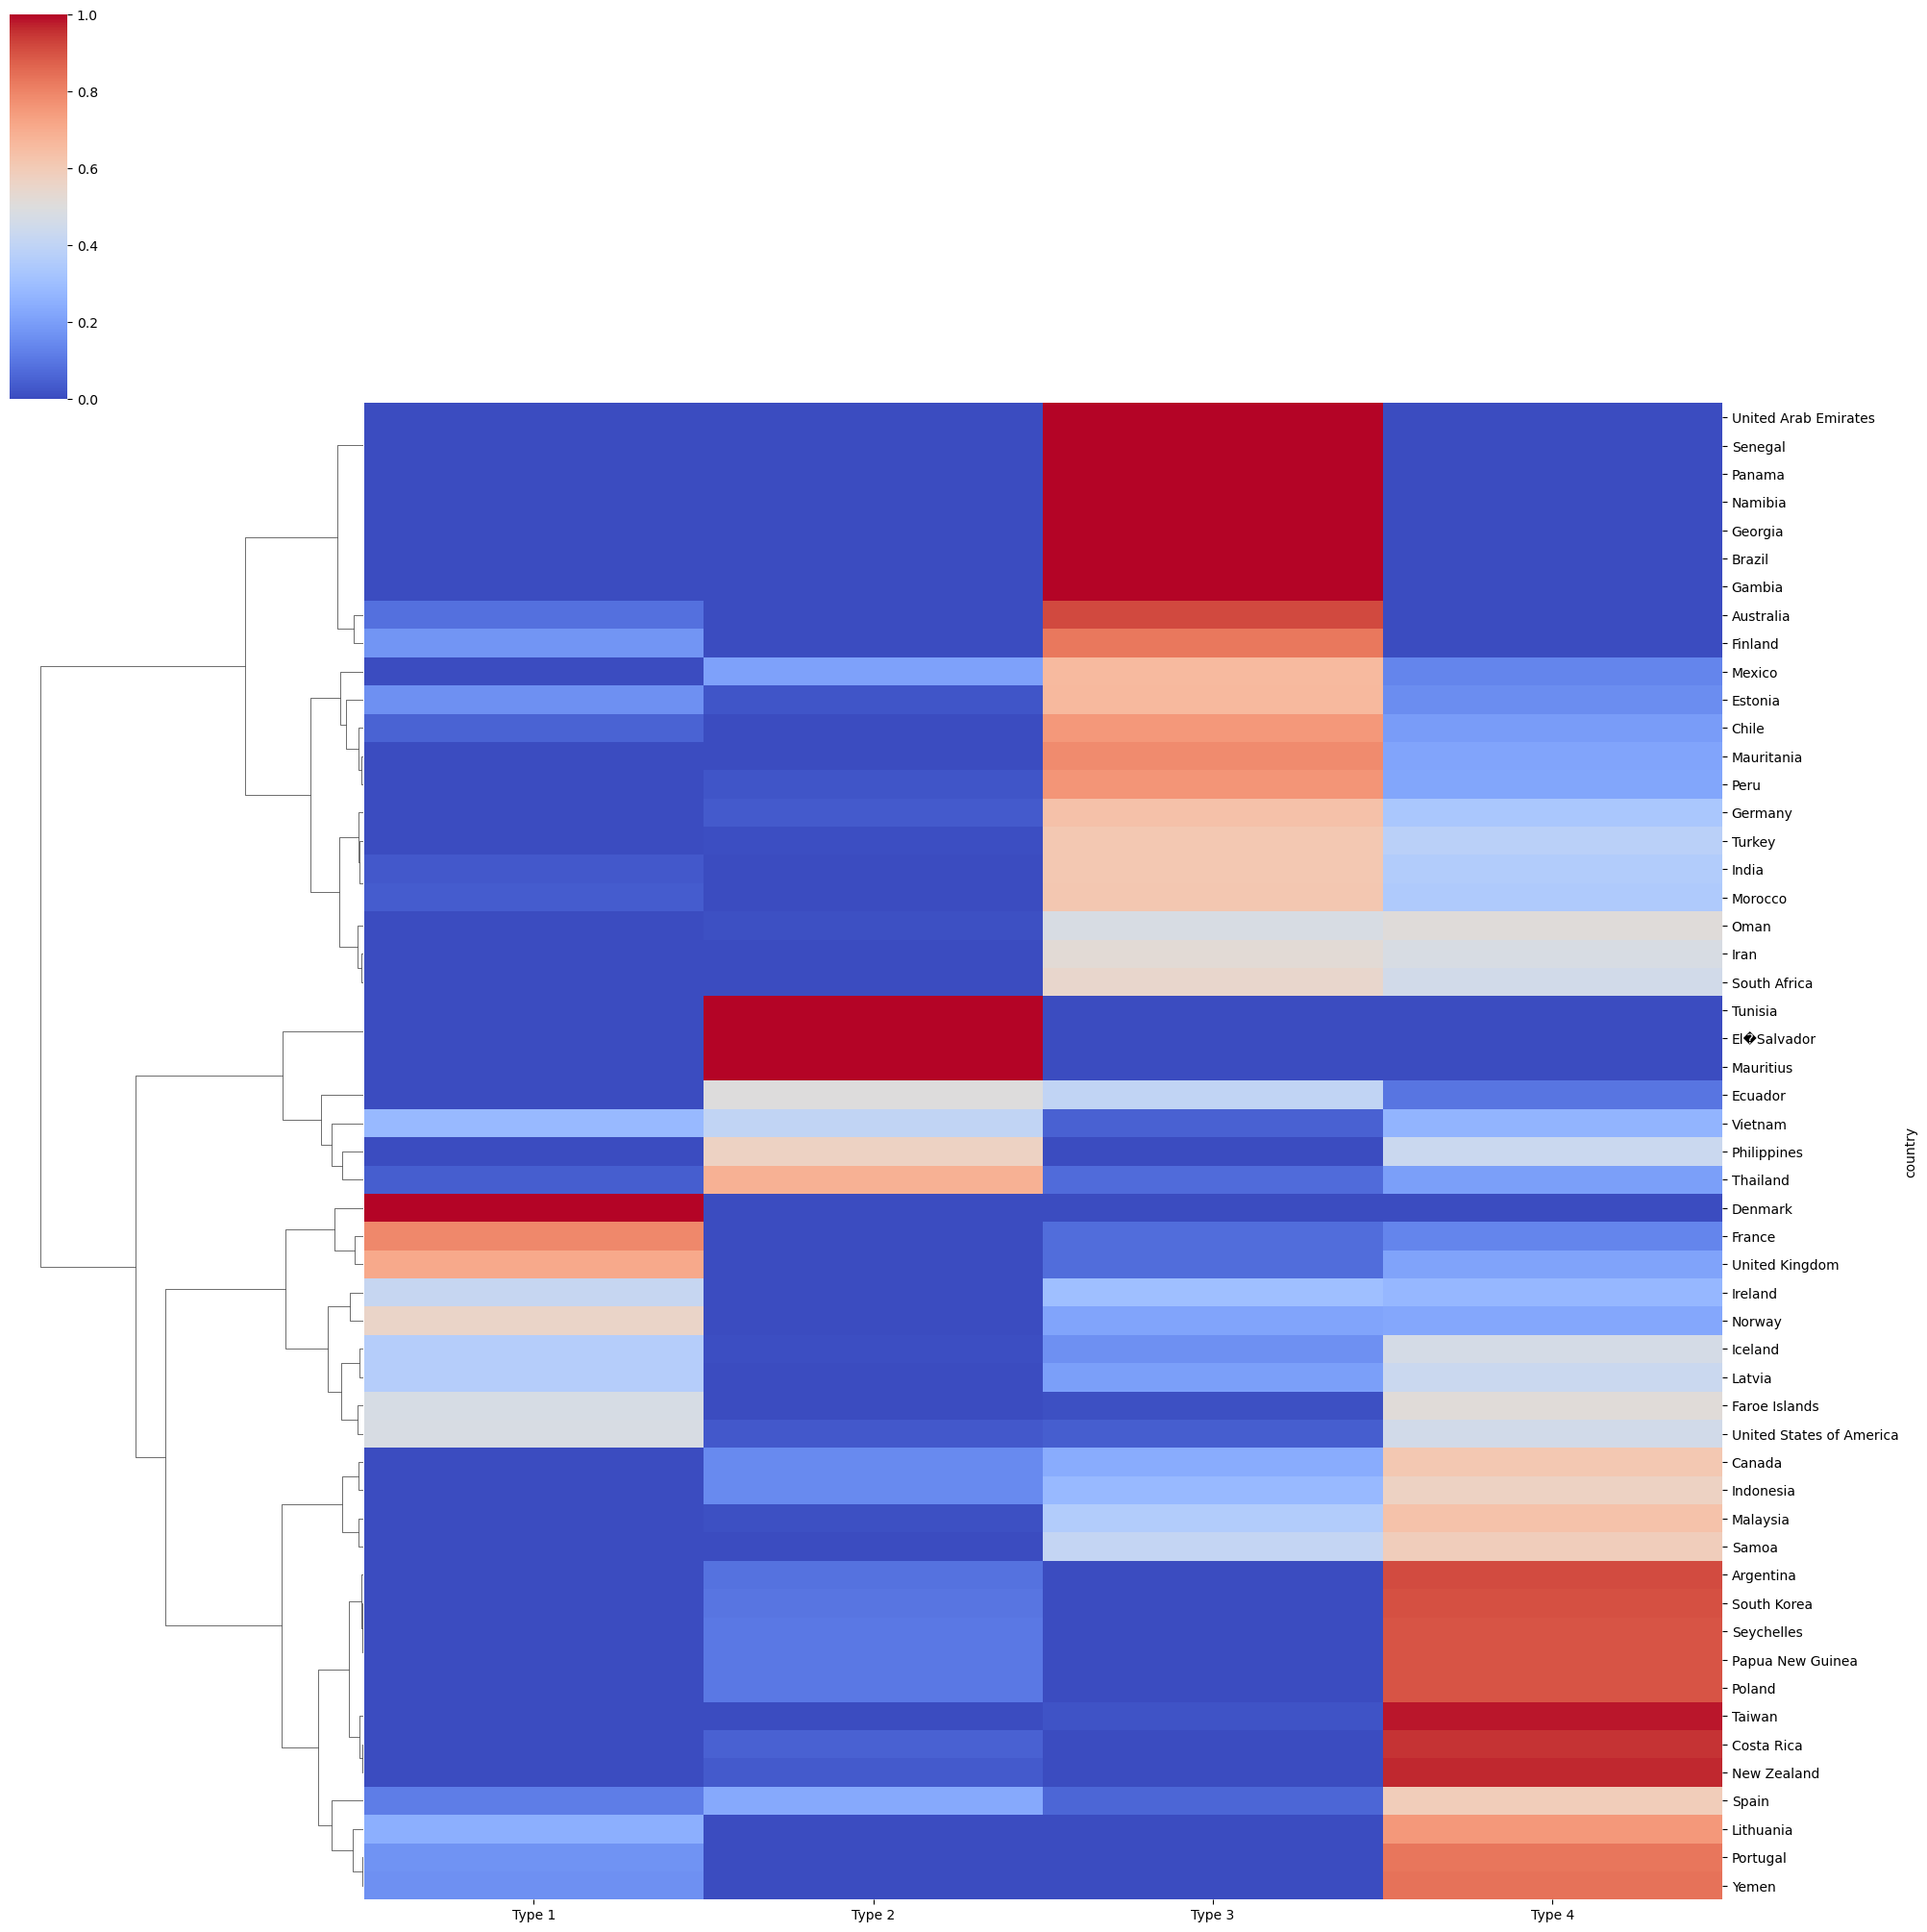

In [153]:
import seaborn as sns

sns.clustermap(cleaned_w, method='ward', cmap='coolwarm', figsize=(20,20), cbar_pos= (0, 0.8, .03, .2), row_cluster=True, col_cluster=False)

In [155]:
cleaned_w.head()

,Type 1,Type 2,Type 3,Type 4
country,,,,
Argentina,0.000000,0.086418,0.000000,0.913582
Australia,0.084370,0.000000,0.915630,0.000000
Brazil,0.000000,0.000000,1.000000,0.000000
Canada,0.000000,0.147545,0.242183,0.610272
Chile,0.051137,0.000000,0.753904,0.194959


Text(0, 0.5, 'distance')

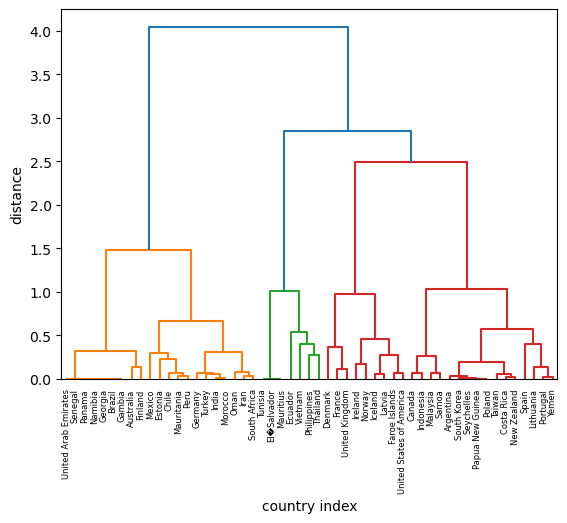

In [156]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

ax = plt.gca()
dendrogram(ward(cleaned_w), ax=ax, labels=cleaned_w.index.tolist())
plt.xlabel("country index")
plt.ylabel("distance")

In [162]:
# filter X for Chile and Peru
X.loc[['Chile', 'Peru', 'Mauritania']]

,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,Anglerfish,Araucanian Herring,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
country,,,,,,,,,,,,,,,,,,,,,
Chile,33.33,24.24,0.0,81.82,0.0,0.0,12.12,24.24,0.0,15.15,...,0.0,0.0,3.03,0.0,0.0,69.70,0.0,0.0,0.0,0.0
Peru,0.00,39.20,0.0,60.80,0.0,0.0,60.80,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,60.80,0.0,0.0,0.0,0.0
Mauritania,0.00,4.76,0.0,14.29,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,14.29,0.0,0.0,0.0,0.0


In [ ]:
gdp_per_capita = pd.read_csv('../data/raw/worldbank/gdp_per_capita_world_bank.csv', )

In [170]:
gdp_per_capita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.220150,27441.550210,28440.041690,30082.158420,30645.890600,22759.807180,26749.329610,30975.998910,35718.753120,39498.594130
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.089204,186.909053,197.367547,225.400079,208.962717,226.836135,...,1498.875240,1334.470500,1528.104224,1552.073722,1507.085600,1351.591669,1562.416175,1679.327622,1571.449189,1615.396356
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.936832,127.451040,133.823783,139.004980,148.545883,155.561897,...,1860.727686,1630.039439,1574.230564,1720.140092,2216.385055,2030.861659,2112.794076,2138.473153,1841.855064,1411.337029
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3641.728939,2051.814621,2790.718869,2860.093648,2493.678844,1759.356199,2303.908127,3682.113151,2916.136633,2665.874448
